In [2]:

import numpy as np
import pandas as pd
import time
import threading
import random as r
import matplotlib.pyplot as plt

In [3]:
def genRandMatrix(n, size):
    matrices = []
    for _ in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

def matrixMultiplication(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def threadMultipl(num_threads):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=matrixMultiplication, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

In [4]:
n = 100
matrix_size = 1000
matrices=genRandMatrix(n,matrix_size)

In [5]:
results = {}
for num_threads in range(1, 15):
    time_taken = threadMultipl(num_threads)
    results[num_threads] = time_taken


In [6]:
df = pd.DataFrame.from_dict(results, orient='index', columns=['Time Taken (s)'])
df['Threads']=[1,2,3,4,5,6,7,8,9,10,11,12,13,15]
column_to_move = df.pop("Threads")
df.insert(0, "Threads", column_to_move)
df.set_index('Threads', inplace=True)

,Time Taken (s)
Threads,
1,4.659473
2,3.812275
3,3.682240
4,3.706852
5,3.759582
6,3.148959
7,3.514324
8,3.284013
9,3.202495


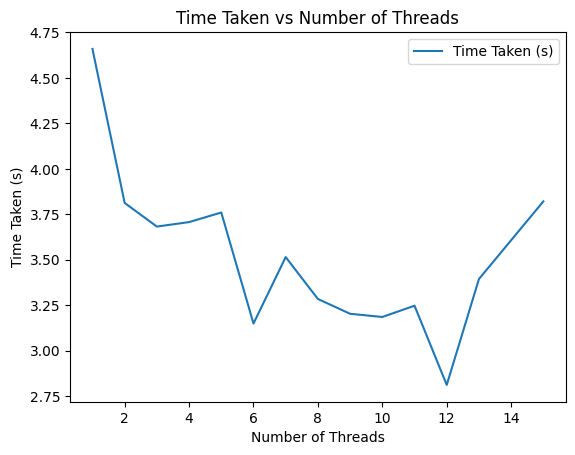

In [7]:
display(df)

# Plot
df.plot()
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Number of Threads')
plt.show()